In [2]:
from google.colab import files

uploaded = files.upload()

Saving breast-cancer.txt to breast-cancer.txt


krok 2


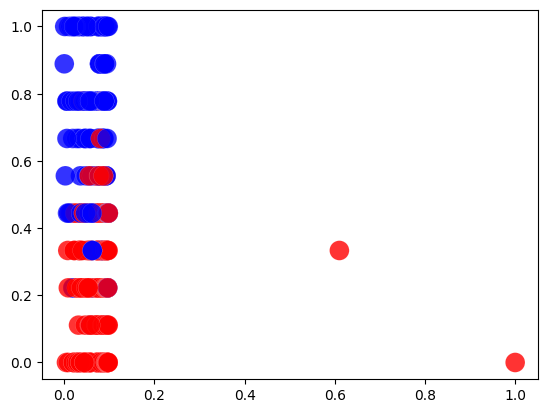

krok 3
Współczynnik wyrazu wolnego: -1.1324911523812116
Współczynniki regresji: [-0.24706384  0.57009103  0.39515016  0.28364289  0.14729084  0.18073653
  0.81355925  0.34444245  0.33313926  0.01678741]
krok 4


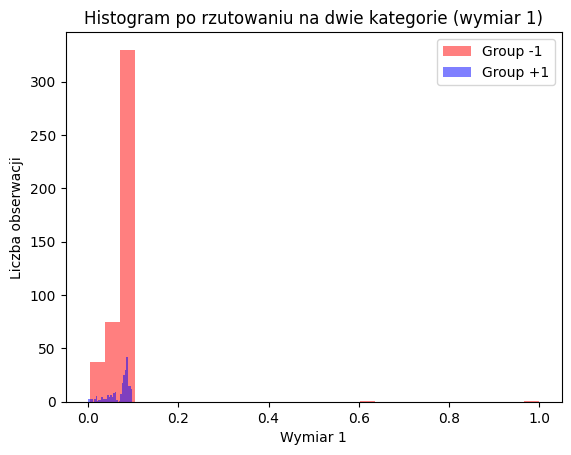

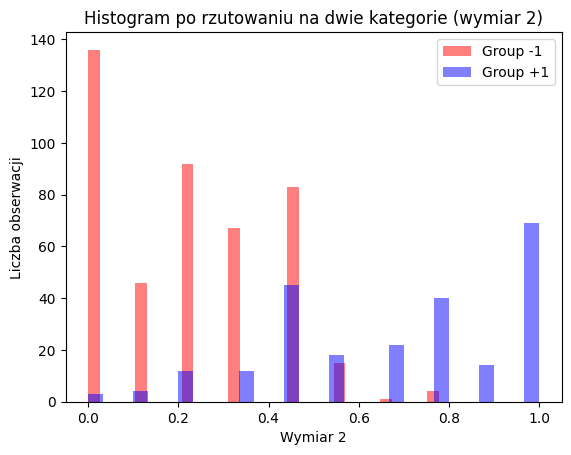

krok 5
Etykiety klasyfikacyjne:
[-1.  1. -1.  1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.
  1. -1.  1.  1. -1. -1.  1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.  1.
 -1.  1.  1.  1.  1. -1.  1. -1.  1. -1. -1.  1. -1. -1.  1.  1.  1.  1.
  1. -1.  1. -1.  1. -1.  1. -1. -1. -1. -1.  1.  1. -1. -1.  1. -1.  1.
  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1.  1.  1.  1. -1. -1. -1.  1. -1.  1.  1. -1.  1.
 -1.  1.  1.  1. -1. -1. -1.  1. -1. -1. -1. -1.  1.  1.  1. -1.  1. -1.
  1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1.  1. -1.
 -1.  1. -1.  1.  1. -1. -1.  1. -1. -1.  1.  1. -1. -1. -1. -1.  1.  1.
 -1. -1. -1. -1. -1.  1.  1.  1. -1.  1. -1.  1. -1. -1. -1.  1.  1. -1.
  1.  1.  1. -1.  1.  1. -1. -1. -1. -1.  1. -1. -1. -1.  1.  1. -1. -1.
 -1.  1.  1. -1. -1. -1.  1.  1. -1.  1.  1.  1. -1. -1.  1. -1. -1.  1.
 -1.  1.  1. -1.  1.  1. -1.  1.  1.  1. -1.  1. -1.  1.  1.  1.  1. -1.
 -1. -1. -1. -1. -1

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file


#krok 0
X, y = load_svmlight_file('/content/breast-cancer.txt')
X = X.toarray()

#krok 1
y = np.where(y == 2, -1, np.where(y == 4, 1, y))
X_scaled = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))


#krok 2
print("krok 2")
x_dim1 = X_scaled[:, 0]
x_dim2 = X_scaled[:, 1]

colors = np.where(y == -1, 'red', 'blue')

plt.scatter(x_dim1, x_dim2, c=colors, s=200, alpha=0.8, edgecolors='w', linewidth=0.1)

plt.show()

#krok 3
print("krok 3")
X_extended = np.column_stack((np.ones(X_scaled.shape[0]), X_scaled))
XT = np.transpose(X_extended)
XTX_inv = np.linalg.inv(np.dot(XT, X_extended))
b = np.dot(np.dot(XTX_inv, XT), y)

intercept = b[0]
coefficients = b[1:]

print("Współczynnik wyrazu wolnego:", intercept)
print("Współczynniki regresji:", coefficients)

#krok 4
print("krok 4")
group1_indices = np.where(y == -1)
group2_indices = np.where(y == 1)

plt.hist(x_dim1[group1_indices], bins=30, alpha=0.5, color='red', label='Group -1')
plt.hist(x_dim1[group2_indices], bins=30, alpha=0.5, color='blue', label='Group +1')

plt.xlabel('Wymiar 1')
plt.ylabel('Liczba obserwacji')
plt.title('Histogram po rzutowaniu na dwie kategorie (wymiar 1)')
plt.legend()

plt.show()

plt.hist(x_dim2[group1_indices], bins=30, alpha=0.5, color='red', label='Group -1')
plt.hist(x_dim2[group2_indices], bins=30, alpha=0.5, color='blue', label='Group +1')

plt.xlabel('Wymiar 2')
plt.ylabel('Liczba obserwacji')
plt.title('Histogram po rzutowaniu na dwie kategorie (wymiar 2)')
plt.legend()

plt.show()

#krok 5
print("krok 5")
predictions = np.sign(np.dot(X_extended, b))

predictions[predictions < 0] = -1
predictions[predictions >= 0] = 1

print("Etykiety klasyfikacyjne:")
print(predictions)

#krok 6
print("krok 6")
accuracy = np.mean(predictions == y)
accuracy_percentage = accuracy * 100
print("Dokładność klasyfikacji:", f"{accuracy_percentage:.2f}%")

#krok 7
print("krok 7")
X_extended = np.column_stack((np.ones(X_scaled.shape[0]), X_scaled))

C_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 1000]
best_accuracy = 0
best_C = None

for C in C_values:
    I = np.identity(X_extended.shape[1])
    XTX_inv = np.linalg.inv(np.dot(XT, X_extended) + 1/C * I)
    b = np.dot(np.dot(XTX_inv, XT), y)

    intercept = b[0]
    coefficients = b[1:]

    print(f"\nWspółczynnik wyrazu wolnego dla C = {C}: {intercept}")
    print(f"Współczynniki regresji dla C = {C}: {coefficients}")

    #ocena modelu dla danej wartosci C
    predictions = np.sign(np.dot(X_extended, b))
    accuracy = np.mean(predictions == y)

    print(f"Dla C = {C}, dokładność klasyfikacji: {accuracy * 100:.2f}%")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_C = C

# Wyświetl optymalną wartość C
print(f"\nNajlepsza wartość C: {best_C} z dokładnością klasyfikacji: {best_accuracy * 100:.2f}%")

